## TESS mission

The TESS telescope observes stars for long periods of time, just under a month per sector. By doing so, TESS observes how the brightness of a star changes over time. Not all data in a given sector are recorded. Instead, pixels are selected around particular targeted stars. These cut-out images are called Target Pixel Files, or TPFs.

TPFs can be thought of as stacks of images, with one image for every time stamp. Each regular interval time stamp is referred to as a cadence. The TPF images are cut-out postage stamps of the full CCD observations, making them easier to work with. TPFs also include information about the astronomical background to the image, which is removed from the raw flux, and the aperture used to compute the aperture photometry of your target.

## TESS data product

The TESS data processing pipeline is currently being developed by the Science Processing Operations Center (SPOC) at NASA Ames Research Center. SPOC produces Target Pixel files and Light Curve files.

The data products available from TESS are described in the official TESS data products. We are interested in the following data products:

1) Target Pixel File stored as [ tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_tp.fits ]
2) Light Curve File stored as [ tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_lc.fits ]

Where:

* {date-time}: The time-stamp associated with this file.

* {sctr}: A zero-padded, four-digit integer indicating the sector in which the data were collected, starting with Sector 1.

* {tid}: A zero-padded, 16-digit target identifier that refers to an object in the TESS Input Catalog.

* {scid}: A zero-padded, four-digit identifier of the spacecraft configuration map used to process this data.

* {cr}: A string character that denotes the cosmic ray mitigation procedure.

Note how the names of the two files differ in the last two letters before the extension, i.e., _tp.fits for the Target Pixel file and _lc.fits for the Light Curve file. Light Curve files are obtained using the data in the TPFs; for this reason, they share the same name.

## Download the data products from MAST

TIC number: 308172249.01

## Access the Target Pixel File

* numpy to handle array functions
* matplotlib.pyplot for plotting data
* astropy.io fits for accessing FITS files
* astropy.wcs WCS for World Coordinate Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from astropy.io import fits
from astropy.wcs import WCS          


# SERVE FARE LA STESSA COSA PER ALMENO 3 SETTORI DIVERSI

In [2]:
sector80_tpf = 'MAST_2024-12-04T1047/tess2024170053053-s0080-0000000308172249-0275-s/tess2024170053053-s0080-0000000308172249-0275-s_tp.fits'
sector80_lcf = 'MAST_2024-12-04T1047/tess2024170053053-s0080-0000000308172249-0275-s/tess2024170053053-s0080-0000000308172249-0275-s_lc.fits'

sector79_tpf = 'MAST_2024-12-04T1047/tess2024142205832-s0079-0000000308172249-0274-s/tess2024142205832-s0079-0000000308172249-0274-s_tp.fits'
sector79_lcf = 'MAST_2024-12-04T1047/tess2024142205832-s0079-0000000308172249-0274-s/tess2024142205832-s0079-0000000308172249-0274-s_lc.fits'

sector53_tpf = 'MAST_2024-12-04T1047/tess2022164095748-s0053-0000000308172249-0226-s/tess2022164095748-s0053-0000000308172249-0226-s_tp.fits'
sector53_lcf = 'MAST_2024-12-04T1047/tess2022164095748-s0053-0000000308172249-0226-s/tess2022164095748-s0053-0000000308172249-0226-s_lc.fits'

## Content of Target Pixel File

A FITS file comprises segments called Header/Data Units (HDUs), where the first HDU is called the Primary HDU or Primary Array. The target pixel file contains four extensions: a PRIMARY header, a PIXELS extension, an APERTURE extension and a TARGET COSMIC RAY extension.

* No. 0 (Primary): this HDU contains meta-data related to the entire file.
  
* No. 1 (Pixels): this HDU contains a binary table with 11 columns containing a time series of scalar values or images.

* No. 2 (Aperture): this HDU contains an image that gives information about each pixel and how it was used by the TESS pipeline in the data processing.

* No. 3 (Target Cosmic Ray): this HDU is new in the TESS target pixel files and describes the cosmic rays identified and subtracted from the target pixels. These cosmic ray corrections are only available if the TESS Pipeline cosmic ray correction algorithm was enabled during processing.

In [3]:
fits.info(sector80_tpf)
#fits.info(sector79_tpf)
#fits.info(sector53_tpf)

Filename: MAST_2024-12-04T1047/tess2024170053053-s0080-0000000308172249-0275-s/tess2024170053053-s0080-0000000308172249-0275-s_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   19047R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [4]:
tpf_hdu = fits.open(sector80_tpf)
tpf_hdu[0].header
print(tpf_hdu[0].data) # <-- no data here, go to the next

None


## Contents of the PIXELS extension


The pixels extension contains raw and calibrated pixels collected by the spacecraft at a 2-minute cadence. Here is a summary of the columns available in that extension.

* TIME: Time of mid-cadence stored in BJD-2457000.0

* CADENCENO: Cadence number

* RAW_CNTS: The raw counts per pixel before any processing

* FLUX: The calibrated background-subtracted pixels for each cadence

* FLUX_BKG: The background measured and removed for these pixels

* QUALITY: Quality flags

* POS_CORR1 & POS_CORR2: The (column,row) local motion of the star calculated from the motion polynomials. Motion polynomials are calculated from the PSF centroids of selected stars on each CCD


We can use the columns method to explore the content of a specific HDU. In this case, we explore the second HDU.

In [5]:
tpf_hdu[1].columns  # small image, 11 x 11 pixels

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

In [6]:
# make some images

tpf_hdu = fits.open(sector80_tpf)
tpf_data = tpf_hdu[1].data
#print(tpf_data) #<--- impossibile da interpretare

tpf_data['TIME'] #<--- ci da direttamente l'array che ci interessa

sector80_bjdtdb = tpf_data['TIME'] + 2457000.0

first_image = tpf_data['FLUX'][0]
print(np.shape(tpf_data['FLUX']))
print(np.shape(tpf_data['FLUX'][0]))

(19047, 11, 11)
(11, 11)


In [7]:
#The aperture extension header contains the same WCS as that in the Pixels extension.

wcs = WCS(tpf_hdu[2].header)
#tpf_hdu[2].header

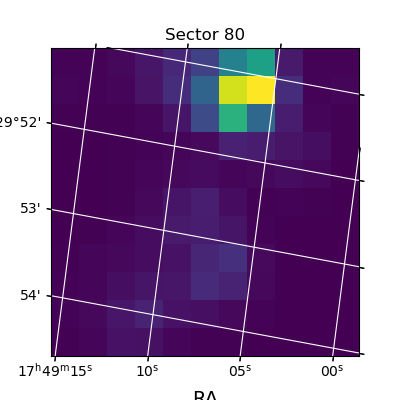

In [8]:
#Plot the first image in the file.

fig = plt.figure(figsize=(4,4))
fig.add_subplot(111, projection=wcs)
plt.imshow(first_image, origin='lower', cmap=plt.colormaps['viridis'])
plt.xlabel('RA', fontsize=14)
plt.ylabel('DEC', fontsize=14)
plt.title('Sector 80')
plt.grid(axis='both', color='white', ls='solid')
plt.show()



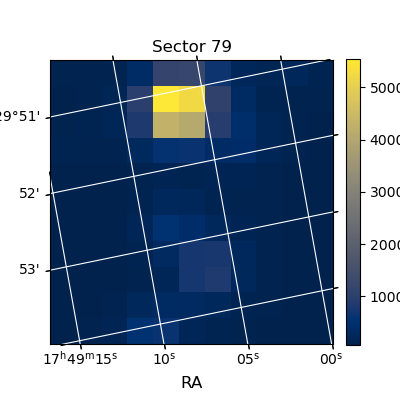

In [9]:
tphdu = fits.open(sector79_tpf)
tpf_data = tphdu[1].data

for i_check in range(0, len(tpf_data['TIME'])):
    if np.isfinite(tpf_data['FLUX'][i_check][0,0]):
      break


first_image = tpf_data['FLUX'][i_check]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(111,projection=wcs)
im = plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 12)
plt.ylabel(r'Dec', fontsize = 12)
plt.title('Sector 79')
plt.grid(axis = 'both', color = 'white', ls = 'solid')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

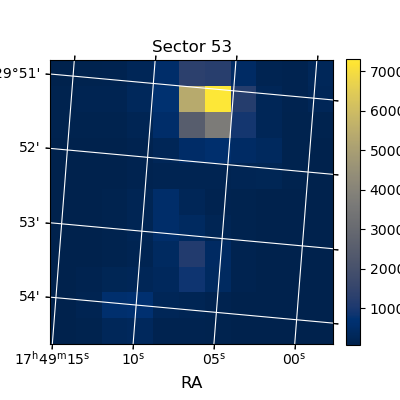

In [10]:
tphdu = fits.open(sector53_tpf)
tpf_data = tphdu[1].data

for i_check in range(0, len(tpf_data['TIME'])):
    if np.isfinite(tpf_data['FLUX'][i_check][0,0]):
      break


first_image = tpf_data['FLUX'][i_check]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(111,projection=wcs)
im = plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 12)
plt.ylabel(r'Dec', fontsize = 12)
plt.title('Sector 53')
plt.grid(axis = 'both', color = 'white', ls = 'solid')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

## Displaying the Aperture Pixel Information


Let's read in the second FITS extension HDU to display the aperture information. First, let's read in the aperture pixels from the HDU.

In [11]:
# APERTURE   <--- usa la TESS table su stem e vedi appunti per spiegazione
ap_image = tpf_hdu[2].data
print(ap_image)

[[129 129 129 129 129 129 129 129 129 129 129]
 [133 129 129 129 129 129 129 129 133 129 129]
 [133 129 129 129 129 129 129 129 133 133 129]
 [133 133 129 129 129 129 129 129 133 133 129]
 [133 133 129 139 139 139 129 129 133 133 129]
 [133 133 129 139 139 139 139 129 133 133 129]
 [133 133 129 139 139 139 129 129 129 129 129]
 [133 133 129 129 129 129 129 129 129 129 129]
 [133 133 133 129 129 129 129 129 129 133 129]
 [129 129 129 129 129 129 129 129 129 129 129]
 [129 129 129 129 129 129 129 129 129 129 129]]


The pixels values are integers that wncodw information about each pixel. A bitmask is base-2 (or binary) number where each figure (or bit) identifies a value (False if the bit is equal to 0, True if the bit is equal to 1) in a list of pre-determined conditions.

For example, a pixel with an aperture value equal to 75 can be broken down into this sum of powers of two: 

$75 = 64 + 8 + 2 + 1 = 2^6 + 2^3 + 2^1 + 2^0 = 1001011$

  in binary notation. Reading the binary number from right to left,  
1001011
  means that Conditions 0, 1, 3, and 6 are True, and all the other conditions are False. To know the actual meaning of the conditions, we have to check the table of Aperture Mask Image Flags defined by the TESS team.


Numpy has a built-in function that can convert an integer into a binary bit mask. Let's use that now one of the values we see in our displayed image above.

In [12]:
np.binary_repr(139)  # attraverso la tabella otteniamo informazioni sull'apertura

'10001011'

## Plot the Aperture Bitmask

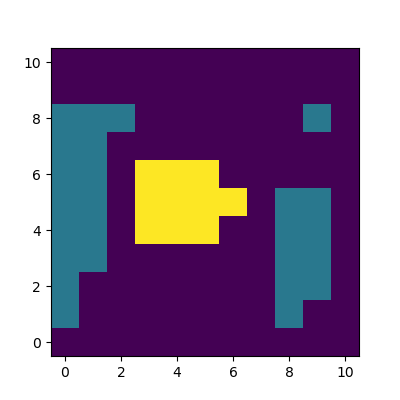

In [13]:
fig, ax = plt.subplots(figsize=(4,4))
plt.imshow(ap_image, origin='lower')
plt.show()

## TESS Light Curve file ##

The TESS Ligh Curve (LCf) file includes data processed from the Target Pixel file (TPf).

The following steps will detail the procedure for extracting photometry for a single sector.

## Simple Aperture Photometry and Pre-search Data Conditioning Simple Aperture Photometry

In aperture photometry, we sum the flux of several pixels belonging to the chosen aperture to produce a single flux value for our star. Before performing this operation, we must ensure that the background flux (e.g., scattered or reflected light by the atmosphere) is subtracted from the pixels in the aperture. This task is accomplished by computing the average background value per pixel using a different aperture. In the TASTE dataset, the aperture comprised all the pixels within the aperture radius from the star's centroid, while the background was computed on an annulus around the star. For TESS, the aperture and background pixels are selected within the available pixels in the Target Pixel file using a different algorithm. Still, aperture photometry is computed precisely in the same way. In the TESS dataset, the name Simple Aperture Photometry (SAP) identifies the aperture photometry.

Pre-search Data Conditioning SAP (PDCSAP) flux is the same aperture photometry extracted from the TPf, with the additional removal of long-term trends and instrumental systematics using so-called Co-trending Basis Vectors (CBVs).
CBVs represent the set of systematic trends present in the ensemble flux data. CBVs are provided for each operational sector of the mission. The TESS pipeline derives these from a Principle Component Analysis and uses them to mitigate systematic artefacts within the target light curves. If TESS users see residual systematic problems within their light curve data, the CBVs can be employed in performing a manual photometric correction more tailored to the user's science.

PDCSAP flux is usually cleaner data than SAP flux and has fewer systematic trends. However, in some cases, the correction may not be successful. Generally, checking the outcome of automatic corrections made by general-purpose pipelines is always a good practice.

#### Riassunto di ChatGPT di quanto sopra
In fotometria di apertura, si somma il flusso dei pixel all'interno di un'apertura attorno alla stella, sottraendo prima il contributo del fondo cielo, che viene stimato in un anello circostante.

Nel dataset TASTE, l'apertura includeva tutti i pixel entro un certo raggio dal centroide della stella, mentre il fondo era calcolato in un anello intorno ad essa. Nel TESS, l'apertura e il fondo sono scelti in modo diverso, ma la fotometria di apertura (SAP) viene calcolata nello stesso modo.

Il flusso PDCSAP è il flusso SAP con la rimozione di trend a lungo termine e problemi strumentali, usando le Co-trending Basis Vectors (CBVs), che rappresentano i trend sistematici dei dati. Questi CBVs vengono derivati con un'Analisi delle Componenti Principali (PCA) e possono essere usati per correggere manualmente eventuali residui di problemi sistematici.

In generale, il PDCSAP è più pulito del SAP, ma è sempre bene controllare le correzioni automatiche per assicurarsi che siano efficaci.








In [14]:
lcf_hdu_80 = fits.open(sector80_lcf)
fits.info(sector80_lcf)
print()
print()
lcf_hdu_79 = fits.open(sector79_lcf)
fits.info(sector79_lcf)
print()
print()
lcf_hdu_53 = fits.open(sector53_lcf)
fits.info(sector53_lcf)

Filename: MAST_2024-12-04T1047/tess2024170053053-s0080-0000000308172249-0275-s/tess2024170053053-s0080-0000000308172249-0275-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19047R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


Filename: MAST_2024-12-04T1047/tess2024142205832-s0079-0000000308172249-0274-s/tess2024142205832-s0079-0000000308172249-0274-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19542R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


Filename: MAST_2024-12-04T1047/tess2022164095748-s0053-0000000308172249-0226-s/tess2022164095748-s0053-0000000308172249-0226-s_lc.fits

Compared with the TPf, we have a smaller number of HDUs.

* No. 0 (Primary): this HDU contains meta-data related to the entire file.
  
* No. 1 (Lightcurve): this HDU contains a binary table that has 11 columns containing a time series of either scalar values or images.

* No. 2 (Aperture): this HDU contains an image that gives information about each pixel and how it was used by ther TESS pipeline in the data processing. This is the same as the target pixel file.

The extracted lightcurves are available in the second HDU, called LIGHTCURVE. We can see from the associated information that the HDU contains a Binary Table (BinTable) with 20 columns (the data of interest) and thousands of rows, each one corresponding to a cadence (exposure). The third HDU APERTURE reports the same information about the aperture contained in the TPf. This information can be used to check if the aperture and background masks used to compute the aperture photometry are the same as those recorded in the TPf.

We can now open the file and check the content of the second HDU (number 1, starting from 0 as Python convention) using the columns method.

In [15]:
lcf_hdu_80[1].columns   
# SAP: simple aperture photometry, as we did
# PDCSAP: un modo di fare differential aperture photometry nel caso di un errore sistematico al telescopio, 
# che influenza il target e tutto il resto, magari solo in un intorno di cielo

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In the case of the TPf, some rows ended with the declaration
dim = '(11,11)'
meaning that the information stored in each row of that specific column was a matrix with the shape 11x11. In this case, no such specification is listed, meaning that the stored array in each row is a single value, either in unsigned byte B (1 byte), single precision float E (32-bit, 4 bytes), or double precision float D (64-bit, 8 bytes).

In [16]:
sector80_lcf = lcf_hdu_80
sector79_lcf = lcf_hdu_79
sector53_lcf = lcf_hdu_53

We can now identify the list of keywords corresponding to the information we want to extract from the LC File.

- SAP_FLUX, unit $e^- / s$ : Simple aperture photometry light curve.
  
- SAP_FLUX_ERR, unit $e^- / s$ : $1 - \sigma$ uncertainty of the SAP light curve.

- PDCSAP_FLUX, unit $e^- / s$ : corrected SAP light curve.

- PDCSAP_FLUX_ERR, unit $e^- / s$ : $1 - \sigma$ uncertainty of the PDC corrected SAP light curve. 

- QUALITY, unit |Bit field|: Quality flags, as bitmask


Subtracting TIMECORR from TIME will give the light arrival time at the spacecraft rather than at the barycenter. It means that the Light Travel Time correction is already included in the reported BJD_TDB. Unlike the TASTE case, we don't have to perform this correction ourselves.

In [17]:
sap_flux_80 = sector80_lcf[1].data['SAP_FLUX']
sap_flux_error_80 = sector80_lcf[1].data['SAP_FLUX_ERR']
pdcsap_flux_80 = sector80_lcf[1].data['PDCSAP_FLUX']
pdcsap_flux_error_80 = sector80_lcf[1].data['PDCSAP_FLUX_ERR']
quality_bitmask_80 = sector80_lcf[1].data['QUALITY']

sap_flux_79 = sector79_lcf[1].data['SAP_FLUX']
sap_flux_error_79 = sector79_lcf[1].data['SAP_FLUX_ERR']
pdcsap_flux_79 = sector79_lcf[1].data['PDCSAP_FLUX']
pdcsap_flux_error_79 = sector79_lcf[1].data['PDCSAP_FLUX_ERR']
quality_bitmask_79 = sector79_lcf[1].data['QUALITY']

sap_flux_53 = sector53_lcf[1].data['SAP_FLUX']
sap_flux_error_53 = sector53_lcf[1].data['SAP_FLUX_ERR']
pdcsap_flux_53 = sector53_lcf[1].data['PDCSAP_FLUX']
pdcsap_flux_error_53 = sector53_lcf[1].data['PDCSAP_FLUX_ERR']
quality_bitmask_53 = sector53_lcf[1].data['QUALITY']

Concerning the time of each exposure, from the comment in the column definition, we can see that an offset has been removed from each time stamp. This standard is usually referred to as Barycentric TESS Julian Date. The documentation explains how to access the constant's value through the header of the fits file. From the documentation, we also get to know that the constant is divided into two parts, an integer one and a real one:

In [18]:
print('BJDREFI header value:  {1:d}, comment: {0:s}'.format(sector80_lcf[1].header.comments['BJDREFI'], sector80_lcf[1].header['BJDREFI']))
print('BJDREFF header value: {1:f}, comment: {0:s}'.format(sector80_lcf[1].header.comments['BJDREFF'], sector80_lcf[1].header['BJDREFF']))

BJDREFI header value:  2457000, comment: integer part of BTJD reference date
BJDREFF header value: 0.000000, comment: fraction of the day in BTJD reference date


To correctly retrieve the time array, we need to convert BTJD into BJD, i.e., adding back the subtracted constant:

In [19]:
bjd_tdb_80 = sector80_lcf[1].data['TIME'] + sector80_lcf[1].header['BJDREFI'] +  sector80_lcf[1].header['BJDREFF']

bjd_tdb_79 = sector79_lcf[1].data['TIME'] + sector79_lcf[1].header['BJDREFI'] +  sector79_lcf[1].header['BJDREFF']

bjd_tdb_53 = sector53_lcf[1].data['TIME'] + sector53_lcf[1].header['BJDREFI'] +  sector53_lcf[1].header['BJDREFF']

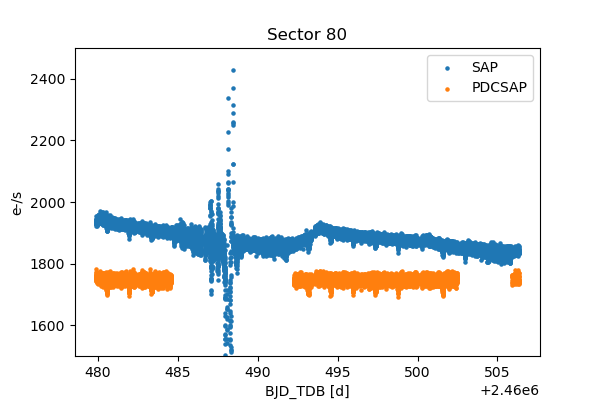

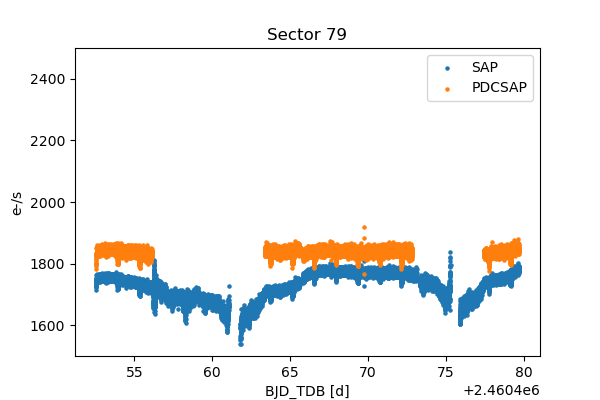

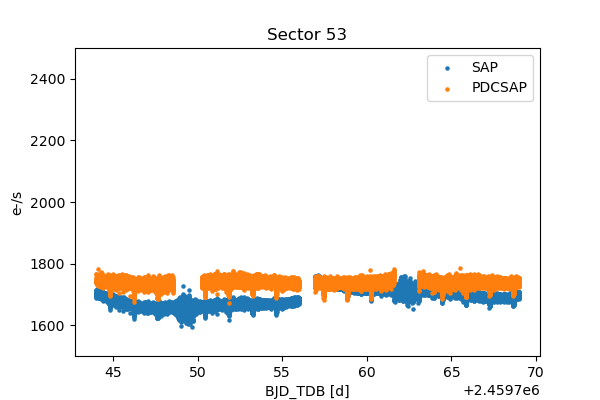

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_80, sap_flux_80, s=5, label='SAP')
plt.scatter(bjd_tdb_80, pdcsap_flux_80, s=5, label='PDCSAP')
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title('Sector 80')
plt.ylim(1500, 2500)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_79, sap_flux_79, s=5, label='SAP')
plt.scatter(bjd_tdb_79, pdcsap_flux_79, s=5, label='PDCSAP')
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title('Sector 79')
plt.ylim(1500, 2500)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_53, sap_flux_53, s=5, label='SAP')
plt.scatter(bjd_tdb_53, pdcsap_flux_53, s=5, label='PDCSAP')
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title('Sector 53')
plt.ylim(1500, 2500)
plt.legend()
plt.show()


Apparently, the number of points in the PDCSAP is smaller than in the SAP. However, if we look at the shape of the two flux arrays, we can see that the number of points is the same.

In [21]:
print('Number of BJD epochs   :', np.shape(bjd_tdb_80))
print('Number of SAP epochs   :', np.shape(sap_flux_80))
print('Number of PDCSAP epochs:', np.shape(pdcsap_flux_80))

Number of BJD epochs   : (19047,)
Number of SAP epochs   : (19047,)
Number of PDCSAP epochs: (19047,)


What is the solution to this apparent inconsistency? If we print the elements of the pdcsap_flux array that do not seem to have only the SAP counterpart in the plot, we can see that these values are all nan, which stands for not a number. A not a number (nan or NaN) is a particular value of a numeric data type that is undefined or unrepresentable, such as the result of zero divided by zero. Depending on the case, you may also get inf, which stands for infinite. By default, matplotlib will not display these values, although they are still in your array.

In [22]:
print('Some elements of PDCSAP:', pdcsap_flux[0:10])

NameError: name 'pdcsap_flux' is not defined

When analyzing your data, you should exclude these values, as some algorithms do not handle them well. Numpy provides several logic function to check the properties of your array.

In [37]:
np.nanmedian(sap_flux)     # calcola la mediana di un array ignorando i valori NaN (Not a Number)

1876.8549

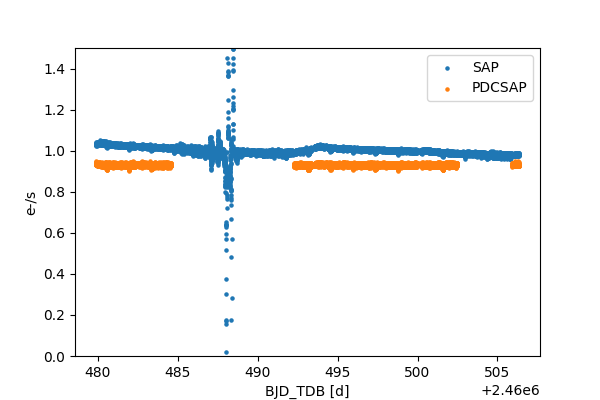

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_80, sap_flux_80 / np.nanmedian(sap_flux), s=5, label='SAP')
plt.scatter(bjd_tdb_80, pdcsap_flux_80 / np.nanmedian(sap_flux), s=5, label='PDCSAP')
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.ylim(0, 1.5)
plt.legend()
plt.show()

Below, we construct a boolean array with True values that correspond to the PDCSAP's finite values.

In [44]:
finite_selection_80 = np.isfinite(pdcsap_flux_80)
print(np.sum(finite_selection_80))

finite_selection_79 = np.isfinite(pdcsap_flux_79)
print(np.sum(finite_selection_79))

finite_selection_53 = np.isfinite(pdcsap_flux_53)
print(np.sum(finite_selection_53))

10683
10865
15069


We can now use the Cadence Quality Flags provided by TESS Team and stored as a bitmask (converted to an integer decimal number) in the quality array of the LCf.
We can have a choice here: we can be conservative (or pessimistic) or selective (or optimistic):

- in the conservative case, we exclude all the points that have any flag marked as True. Any possible problem among those listed on the Cadence Quality Flag page will cause the exclusion of the observation from our analysis

- in the selective case, we decide which errors prevent our observations from being considered

In [49]:
print(quality_bitmask_80)
print()
print(quality_bitmask_79)
print()
print(quality_bitmask_53)

[168  32  32 ...   0   0   0]

[40 32 32 ...  0  0  0]

[168  32  32 ...   0   0   0]


### First conservative case

In [55]:
conservative_selection_80 = (quality_bitmask_80 == 0)
print(conservative_selection_80)

conservative_selection_80 = ~(quality_bitmask_80 > 0) & finite_selection_80

[False False False ...  True  True  True]


In [51]:
conservative_selection_79 = (quality_bitmask_79 == 0)
print(conservative_selection_79)

conservative_selection_79 = ~(quality_bitmask_79 > 0) & finite_selection_79

[False False False ...  True  True  True]


In [52]:
conservative_selection_53 = (quality_bitmask_53 == 0)
print(conservative_selection_53)

conservative_selection_53 = ~(quality_bitmask_53 > 0) & finite_selection_53

[False False False ...  True  True  True]


### Second selective case

 According to the Cadence Quality Flags page, the following flags (starting from 1) indicate that the cadence will likely be of lesser quality: 1, 2, 3, 4, 5, 6, 8, 10, 13, and 15. This selection corresponds to the binary mask  
0101001010111111

Our reference bitmask is then compared with the quality bitmask of each observation. If at least one flag is marked as True in both the reference bitmask and the quality bitmask of the observation, then the observation will be marked as bad. We perform our final selection (good quality flag and finite value) in the same way as in the conservative case.

In [45]:
# 1, 2, 3, 4, 5, 6, 8, 10, 13, 15, according to the Cadence Quality Flags page
flags_to_be_checked = np.array([1,2,3,4,5,6,8,10,13,15])
reference_bitmask_in_decimal_system = 0
for v in flags_to_be_checked:
    reference_bitmask_in_decimal_system += 2**(v-1)


In [56]:
index_example_observation = 3
    
print('Value corresponding to the active flags {0:16d}'.format(reference_bitmask_in_decimal_system))
print('example quality bitmask                 {0:16d}'.format(quality_bitmask_80[index_example_observation]))
print()
print('binary representation of the selected flags    {0:16d}'.format(int(np.binary_repr(reference_bitmask_in_decimal_system))))
print('binary representation of the selected example  {0:16d}'.format(int(np.binary_repr(quality_bitmask_80[index_example_observation]))))
print()

print('Are we supposed to exclude this point?  {0:}'.format(np.bitwise_and(quality_bitmask_80[index_example_observation], reference_bitmask_in_decimal_system)> 0))

# bitwise comparison between the reference value and the quality flag
# each flag must be active in your selection AND active in the 
# at least one flag must be positive in order to exclude the point

selective_selection_80 = ~(np.bitwise_and(quality_bitmask_80, reference_bitmask_in_decimal_system) > 0) & finite_selection_80
print(selective_selection_80)

Value corresponding to the active flags            21183
example quality bitmask                               32

binary representation of the selected flags     101001010111111
binary representation of the selected example            100000

Are we supposed to exclude this point?  True
[False False False ...  True  True  True]


In [58]:
# Il comando np.bitwise_and(x, y) esegue l'operazione AND bit a bit tra due numeri (o array di numeri).
# L'operazione AND restituisce 1 solo se entrambi i bit corrispondenti sono 1, altrimenti restituisce 0.
np.bitwise_and(quality_bitmask_80[index_example_observation], reference_bitmask_in_decimal_system)

32

In [59]:
# Il comando np.binary_repr(n, width=None) restituisce la rappresentazione binaria di un numero intero come stringa.
# Possiamo usare entrambi i comandi insieme per vedere il risultato dell'AND bitwise in binario
np.binary_repr(np.bitwise_and(quality_bitmask_80[index_example_observation], reference_bitmask_in_decimal_system))

'100000'

In [28]:
selective_selection = (np.bitwise_and(quality_bitmask, reference_bitmask_in_decimal_system) == 0)
print(np.sum(selective_selection))

10683


In [29]:
selective_selection = ~(np.bitwise_and(quality_bitmask, reference_bitmask_in_decimal_system) > 0) & finite_selection
print(np.sum(selective_selection))

10683


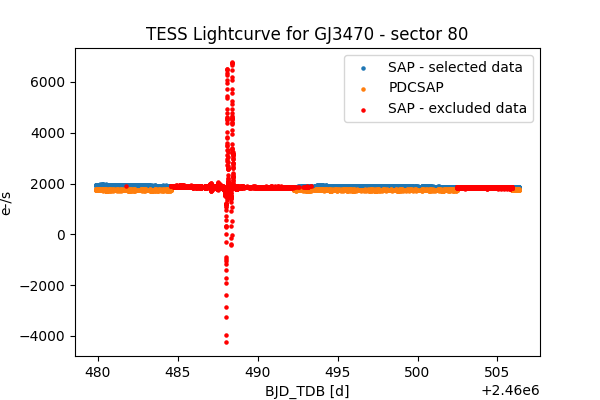

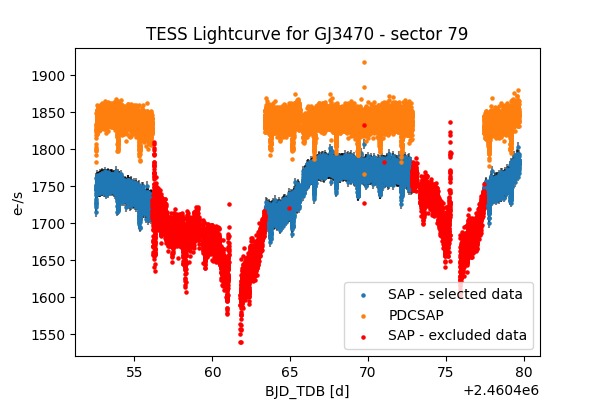

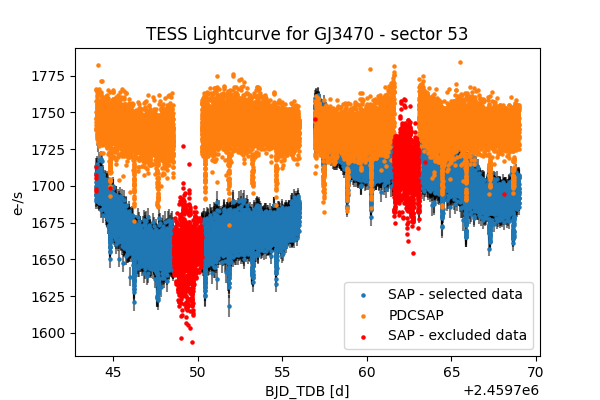

In [62]:
plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_80[conservative_selection_80], sap_flux_80[conservative_selection_80],
            s=5, label='SAP - selected data')
plt.scatter(bjd_tdb_80, pdcsap_flux_80, s=5, label='PDCSAP')
plt.scatter(bjd_tdb_80[~conservative_selection_80], sap_flux_80[~conservative_selection_80],
            s=5, c='r', label='SAP - excluded data')
plt.errorbar(bjd_tdb_80[conservative_selection_80], sap_flux_80[conservative_selection_80],
            yerr=sap_flux_error_80[conservative_selection_80], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for GJ3470 - sector 80", fontsize = 12)

plt.legend()
plt.show()

print()

plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_79[conservative_selection_79], sap_flux_79[conservative_selection_79],
            s=5, label='SAP - selected data')
plt.scatter(bjd_tdb_79, pdcsap_flux_79, s=5, label='PDCSAP')
plt.scatter(bjd_tdb_79[~conservative_selection_79], sap_flux_79[~conservative_selection_79],
            s=5, c='r', label='SAP - excluded data')
plt.errorbar(bjd_tdb_79[conservative_selection_79], sap_flux_79[conservative_selection_79],
            yerr=sap_flux_error_79[conservative_selection_79], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for GJ3470 - sector 79", fontsize = 12)

plt.legend()
plt.show()

print()

plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb_53[conservative_selection_53], sap_flux_53[conservative_selection_53],
            s=5, label='SAP - selected data')
plt.scatter(bjd_tdb_53, pdcsap_flux_53, s=5, label='PDCSAP')
plt.scatter(bjd_tdb_53[~conservative_selection_53], sap_flux_53[~conservative_selection_53],
            s=5, c='r', label='SAP - excluded data')
plt.errorbar(bjd_tdb_53[conservative_selection_53], sap_flux_53[conservative_selection_53],
            yerr=sap_flux_error_53[conservative_selection_53], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for GJ3470 - sector 53", fontsize = 12)

plt.legend()
plt.show()

In [64]:
final_selection_80 = conservative_selection_80 #& (bjd_tdb > 2459500.6)     # <-- aggiungi questo se hai un transito spezzato all'inizio o alla fine
final_selection_79 = conservative_selection_79 
final_selection_53 = conservative_selection_53 

import pickle

sector80_dictionary = {
    'time': bjd_tdb_80[final_selection_80],
    'sap_flux': sap_flux_80[final_selection_80],
    'sap_flux_error': sap_flux_error_80[final_selection_80],
    'pdcsap_flux': pdcsap_flux_80[final_selection_80],
    'pdcsap_flux_error': pdcsap_flux_error_80[final_selection_80]
}
pickle.dump(sector80_dictionary, open('WASP135_TESS_sector80_selected.p', 'wb'))


sector79_dictionary = {
    'time': bjd_tdb_79[final_selection_79],
    'sap_flux': sap_flux_79[final_selection_79],
    'sap_flux_error': sap_flux_error_79[final_selection_79],
    'pdcsap_flux': pdcsap_flux_79[final_selection_79],
    'pdcsap_flux_error': pdcsap_flux_error_79[final_selection_79]
}
pickle.dump(sector79_dictionary, open('WASP135_TESS_sector79_selected.p', 'wb'))


sector53_dictionary = {
    'time': bjd_tdb_53[final_selection_53],
    'sap_flux': sap_flux_53[final_selection_53],
    'sap_flux_error': sap_flux_error_53[final_selection_53],
    'pdcsap_flux': pdcsap_flux_53[final_selection_53],
    'pdcsap_flux_error': pdcsap_flux_error_53[final_selection_53]
}
pickle.dump(sector53_dictionary, open('WASP135_TESS_sector53_selected.p', 'wb'))
